In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ORPOP.csv')

In [3]:
df.head()

,DATE,ORPOP
0,1/1/1900,415.0
1,1/1/1901,434.0
2,1/1/1902,454.0
3,1/1/1903,479.0
4,1/1/1904,504.0


In [4]:
df = df[df['DATE'] > '1/1/1950']

In [5]:
df.reset_index(inplace = True)

In [6]:
df

,index,DATE,ORPOP
0,51,1/1/1951,1556.000
1,52,1/1/1952,1582.000
2,53,1/1/1953,1601.000
3,54,1/1/1954,1626.000
4,55,1/1/1955,1659.000
5,56,1/1/1956,1698.000
6,57,1/1/1957,1712.000
7,58,1/1/1958,1718.000
8,59,1/1/1959,1746.000
9,60,1/1/1960,1772.000


In [7]:
df['index'] = df['index'].apply(lambda x: x-51)

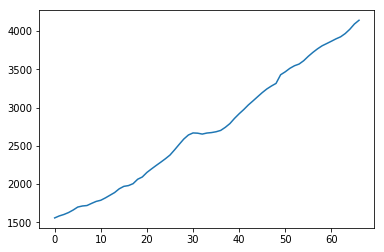

In [8]:
%matplotlib inline
plt.plot(df['ORPOP'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import seaborn as sns

In [10]:
X = df[['index']]
y = df['ORPOP']

In [11]:
svr_lin= SVR(kernel='linear')
pred = svr_lin.fit(X,y).predict(X)

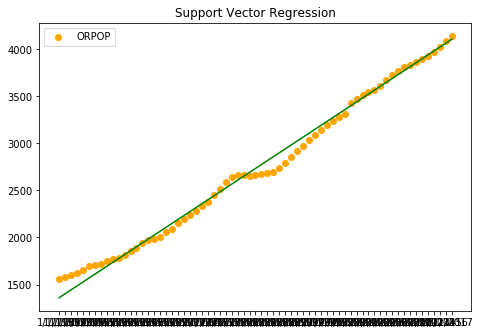

In [86]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Support Vector Regression')

plt.scatter(x = df['DATE'] ,y = y, c='orange')
plt.plot(pred , c='green')
ax.legend() 


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state =10)

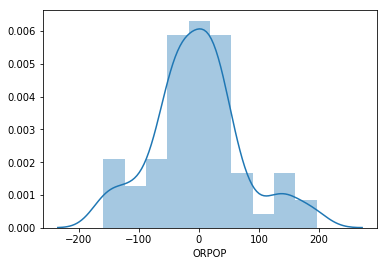

In [15]:
sns.distplot((y - pred))

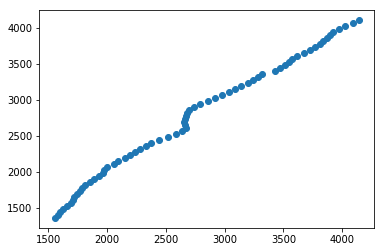

In [17]:
plt.scatter(y, pred)

In [18]:
df.tail()

,index,DATE,ORPOP
62,62,1/1/2013,3925.751
63,63,1/1/2014,3968.371
64,64,1/1/2015,4024.634
65,65,1/1/2016,4093.465
66,66,1/1/2017,4142.776


In [19]:
next4Qs = np.array(range(67,80)).reshape(-1,1)

In [20]:
future = svr_lin.fit(X,y).predict(next4Qs)

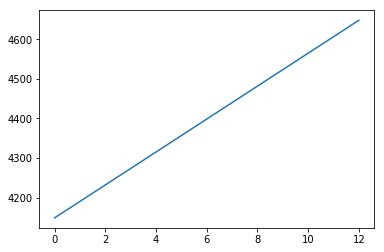

In [21]:
plt.plot(future)

In [22]:
from sklearn import metrics

In [25]:
mse = metrics.mean_squared_error(y, pred)

In [26]:
np.sqrt(mse)

74.5824016720729

In [27]:
future_pop = df['ORPOP']

In [28]:
df2 = future_pop.append(pd.Series(future)).reset_index()

In [29]:
df2.drop(columns = 'index', axis=1, inplace=True)

In [30]:
df2.tail()

,0
75,4481.72848
76,4523.35080
77,4564.97312
78,4606.59544
79,4648.21776


In [31]:
df2.columns = ['ORPOP']

In [32]:
(df2['ORPOP'][1] / df2['ORPOP'][0]) -1

0.016709511568123503

In [33]:
ser1 = []
ser1.append(0.0)
for i in range(0,79):
    revenue = df2['ORPOP'][i+1] / df2['ORPOP'][i] - 1
    ser1.append(revenue)

In [34]:
df2['change'] = ser1

In [35]:
df2.head()

,ORPOP,change
0,1556.0,0.000000
1,1582.0,0.016710
2,1601.0,0.012010
3,1626.0,0.015615
4,1659.0,0.020295


In [36]:
df2.tail()

,ORPOP,change
75,4481.72848,0.009374
76,4523.35080,0.009287
77,4564.97312,0.009202
78,4606.59544,0.009118
79,4648.21776,0.009035


In [37]:
df2.to_csv('OrePOP_forecast_SVR.csv')

In [55]:
sns.regplot(x=df['index'],y=[df['ORPOP'],pred] )

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [54]:
pd.DataFrame(pred).to_csv('asdf.csv')